In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [11]:
data = pd.read_csv('data/data_pre_processed.csv')
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data.values)

KMeans(n_clusters=5, random_state=0)

In [12]:
full_wcss = kmeans.inertia_

feature_scores = []

for i, feature_name in enumerate(data.columns):
    X_reduced = np.delete(data, i, axis=1)
    kmeans_reduced = KMeans(n_clusters=5, random_state=0)
    kmeans_reduced.fit(X_reduced)
    reduced_wcss = kmeans_reduced.inertia_

    importance = reduced_wcss - full_wcss
    feature_scores.append((feature_name, importance))

feature_scores = sorted(feature_scores, key=lambda x: x[1], reverse=True)

for feature, score in feature_scores:
    print(f"{feature}: {score:.6f}")

EDA_TD_T_Median: 1175.821722
EDA_TD_T_Mean: 1175.587711
EDA_TD_T_AUC: 1172.110830
EDA_TD_P_Slope_mean: 998.063860
EDA_TD_P_Slope_max: 828.391879
EDA_TD_P_Slope: 787.237936
HR_TD_Kurtosis: 517.346255
attentive: 450.410819
EDA_TD_P_Max: 139.727365
EDA_TD_T_Slope_max: 128.402614
Frustrated: -3.749396
hostile: -22.659075
afraid: -22.898952
EDA_TD_P_Mean: -45.449540
EDA_TD_P_AUC: -49.074763
EDA_TD_P_Median: -51.229214
HR_TD_Slope_max: -69.444569
EDA_TD_P_std: -72.249231
Puzzler: -75.160365
ashamed: -90.048887
nervous: -98.479226
EDA_TD_T_Slope_min: -99.836890
EDA_TD_T_std: -108.830802
upset: -114.933068
Cohort: -115.374607
EDA_TD_P_Slope_min: -118.839234
EDA_TD_T_Max: -156.631895
TEMP_TD_Min: -158.285183
TEMP_TD_Median: -167.074073
TEMP_TD_Mean: -167.227576
TEMP_TD_Max: -170.402146
Phase: -208.000000
EDA_TD_T_Min: -226.053148
TEMP_TD_AUC: -243.463391
EDA_TD_P_Skew: -244.530855
EDA_TD_P_Min: -262.937127
EDA_TD_P_Peaks: -274.040845
TEMP_TD_std: -276.988405
EDA_TD_P_Kurtosis: -280.872711
EDA_T

In [13]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
data['cluster'] = kmeans.labels_


In [14]:
top_features = [
    'Frustrated', 'hostile', 'afraid', 'Puzzler', 'nervous', 'upset',
    'EDA_TD_P_std', 'EDA_TD_T_std', 'HR_TD_Median', 'EDA_TD_P_Peaks',
    'HR_TD_Slope_min', 'HR_TD_Max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
    'EDA_TD_T_Slope', 'EDA_TD_T_Slope_mean', 'EDA_TD_T_Slope_max',
    'EDA_TD_T_Slope_min', 'EDA_TD_P_AUC'
]

In [ ]:
top_20_features = [
    'EDA_TD_T_Median',
    'EDA_TD_T_Mean',
    'EDA_TD_T_AUC',
    'EDA_TD_P_Slope_mean',
    'EDA_TD_P_Slope_max',
    'EDA_TD_P_Slope',
    'HR_TD_Kurtosis',
    'attentive',
    'EDA_TD_P_Max',
    'EDA_TD_T_Slope_max',
    'Frustrated',
    'hostile',
    'afraid',
    'EDA_TD_P_Mean',
    'EDA_TD_P_AUC',
    'EDA_TD_P_Median',
    'HR_TD_Slope_max',
    'EDA_TD_P_std',
    'Puzzler',
    'ashamed'
]


In [20]:
top_20_features = [
    'EDA_TD_T_Median',
    'EDA_TD_T_Mean',
    'EDA_TD_T_AUC',
    'EDA_TD_P_Slope_mean',
    'EDA_TD_P_Slope_max',
    'EDA_TD_P_Slope',
    'HR_TD_Kurtosis',
    'attentive',
    'EDA_TD_P_Max',
    'EDA_TD_T_Slope_max'
]

In [21]:
cluster_means = data.groupby('cluster')[top_20_features].mean()
print(cluster_means)

         EDA_TD_T_Median  EDA_TD_T_Mean  EDA_TD_T_AUC  EDA_TD_P_Slope_mean  \
cluster                                                                      
0               1.171536       1.180137      1.168888             0.119725   
1              -0.511912      -0.518492     -0.501801            -0.342066   
2              -0.097250      -0.090847     -0.089277            -0.152771   
3              -0.368660      -0.364076     -0.373977            -0.199505   
4               1.043725       0.992434      0.966370             3.933726   

         EDA_TD_P_Slope_max  EDA_TD_P_Slope  HR_TD_Kurtosis  attentive  \
cluster                                                                  
0                  0.734560        0.042371        0.162580   2.813559   
1                 -0.589126       -0.277552        0.042573   2.500000   
2                 -0.138846       -0.096561       -0.005570   2.944444   
3                 -0.263818       -0.220379       -0.114585   3.166667   
4        

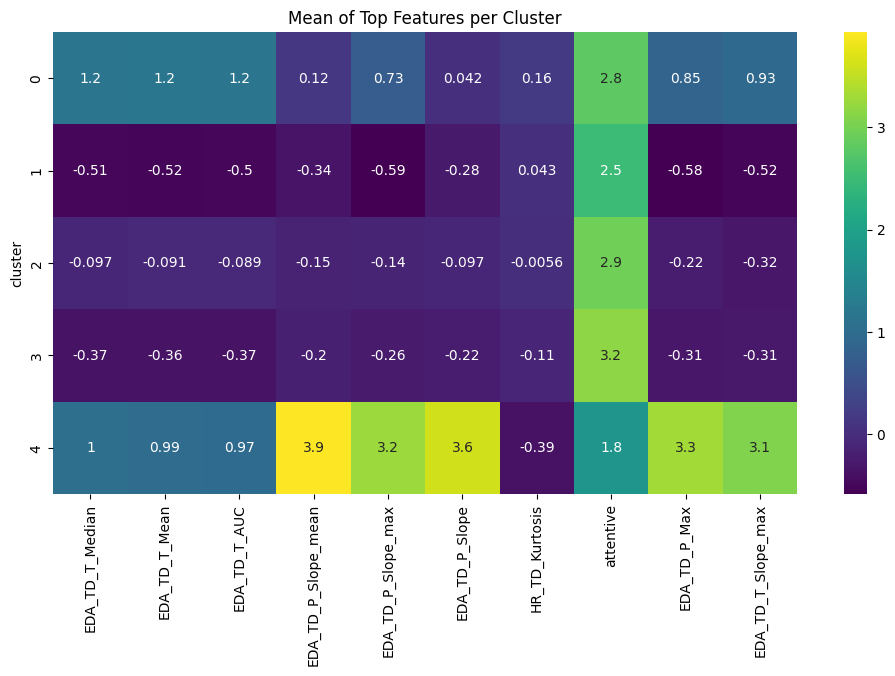

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, cmap='viridis')
plt.title("Mean of Top Features per Cluster")
plt.show()